### Load VGG19 Model

In [ ]:
tf.compat.v1.disable_eager_execution()

In [20]:
import warnings
warnings.filterwarnings('ignore')
import requests
from PIL import Image

In [21]:
import tensorflow as tf
model = tf.keras.applications.vgg19.VGG19(weights='imagenet')

### Load an Image

In [22]:
def download(url,fname):
    response = requests.get(url)
    with open(fname,"wb") as f:
        f.write(response.content)

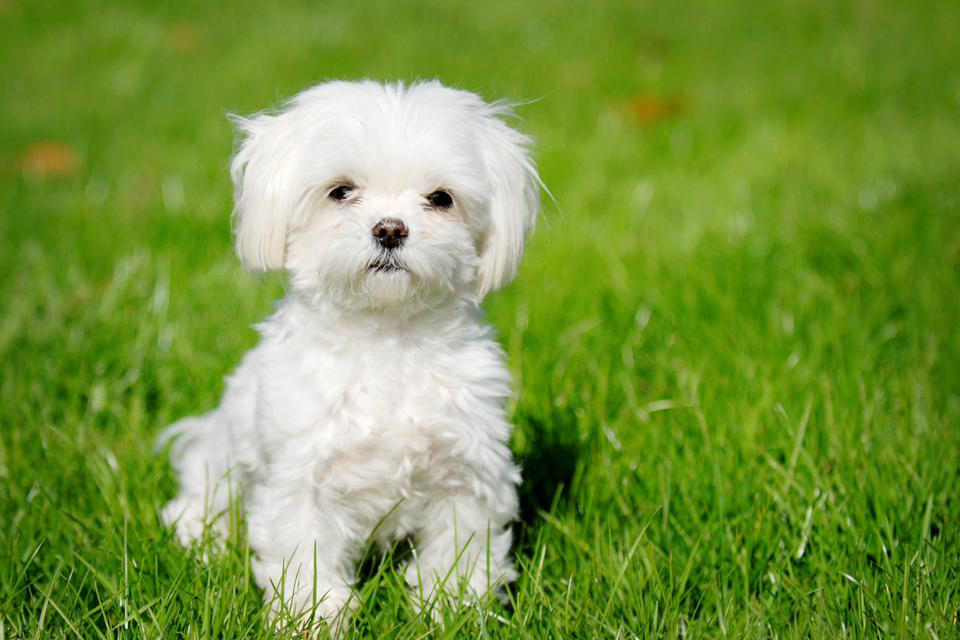

In [23]:
download("https://specials-images.forbesimg.com/imageserve/5db4c7b464b49a0007e9dfac/960x0.jpg?fit=scale","dog.jpeg")
img = tf.keras.preprocessing.image.load_img('dog.jpeg')
img

### Prediction

In [24]:
import numpy as np

In [25]:
#Prepare image prediction
img_array = tf.keras.preprocessing.image.img_to_array(img.resize((224, 224)))

#Normalize the image
img_array[:,:,0] -= 103.939
img_array[:,:,1] -= 116.779
img_array[:,:,2] -= 123.68

#Create a batch
img_array = np.expand_dims(img_array, axis=0)

#Get the prediction
prediction = model.predict(img_array)

#Get the index with highest probability
pred_index = np.argmax(prediction[0])

#Decode prediction
prediction = tf.keras.applications.vgg19.decode_predictions(prediction)

pred_index, prediction

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


(153,
 [[('n02085936', 'Maltese_dog', 0.79400915),
   ('n02098413', 'Lhasa', 0.06204966),
   ('n02096437', 'Dandie_Dinmont', 0.03625377),
   ('n02098286', 'West_Highland_white_terrier', 0.030739402),
   ('n02097474', 'Tibetan_terrier', 0.025017139)]])

ImageNet Class IDs
- https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

### Building Saliency Maps

Access model input and output

In [26]:
input_img = model.input
model_output = model.output

What should be the loss?

In [27]:
loss = tf.keras.backend.mean(model_output[:,258])

Calculate Gradients

In [28]:
#Gradient of loss w.r.t input image
grads = tf.keras.backend.gradients(loss, input_img)[0]

#Gradient normalization
K = tf.keras.backend
grads /= K.sqrt(K.mean(K.square(grads))) + K.epsilon()

#Define function to run Graph
iterate = K.function([input_img], [loss, grads])

In [29]:
loss_value, grads_value = iterate([img_array])

### Plot Gradients as Saliency Map

In [30]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


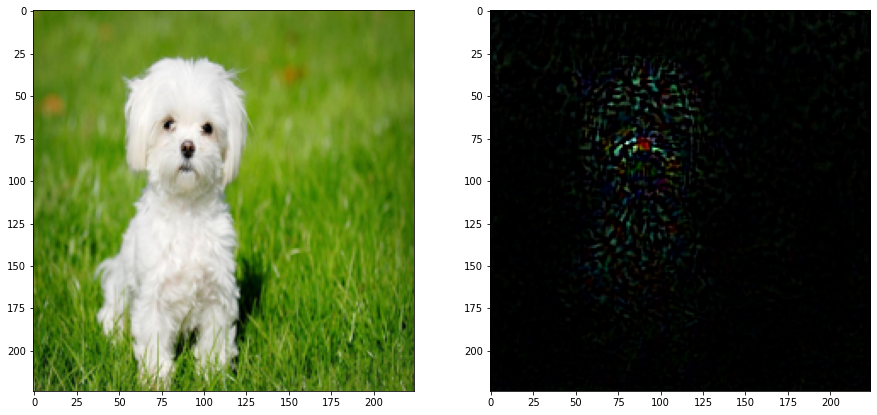

In [31]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img.resize((224,224)))
plt.subplot(1,2,2)
plt.imshow(grads_value[0], cmap='jet')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


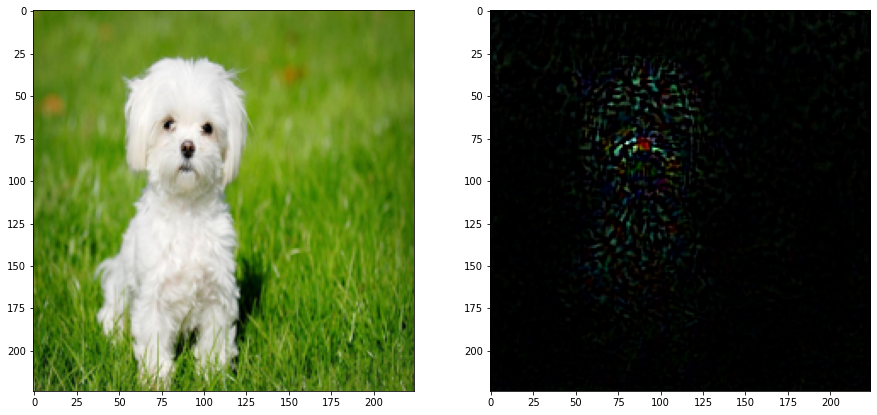

In [37]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img.resize((224,224)))
plt.subplot(1,2,2)
plt.imshow(grads_value[0])
plt.show()

'grey' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean'